In [241]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 1024)
import matplotlib.pyplot as plt
import random

import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten ,GlobalAveragePooling2D, BatchNormalization, Dropout, Dense

from tensorflow.keras.utils import to_categorical


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
%matplotlib inline

# Dataset

The dataset for this project originates from kaggle kernels. Available for free and can be downloaded from here **[here](https://www.kaggle.com/mloey1/ahcd1)**. 
All the datasets are CSV files representing the image pixels values and their corresponding label.

**Description:**

Arabic Letters Dataset is composed of 16,800 characters written by 60 participants, the age range is between 19 to 40 years, and 90% of participants are right-hand. Each participant wrote each character (from ’alef’ to ’yeh’) ten times. The images were scanned at the resolution of 300 dpi. Each block is segmented automatically using Matlab 2016a to determining the coordinates for each block. The dataset is partitioned into two sets: a training set of 13,440 characters to 480 images per class and a test set of 3,360 characters to 120 images per class. Writers of training set and test set are exclusive. Ordering of including writers to test set are randomized to make sure that writers of test set are not from a single institution to ensure variability of the test set. 



# Loading the dataset

Let's load the dataset in using pandas and take a look at it.

In [242]:
TrainImages = pd.read_csv('csvTrainImages 13440x1024.csv')
TrainLabel = pd.read_csv('csvTrainLabel 13440x1.csv')
TestImages = pd.read_csv('csvTestImages 3360x1024.csv')
TestLabel = pd.read_csv('csvTestLabel 3360x1.csv')

In [243]:
TrainImages.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.100,0.101,0.102,0.103,0.104,0.105,0.106,0.107,0.108,0.109,0.110,0.111,0.112,0.113,0.114,0.115,0.116,0.117,0.118,0.119,0.120,0.121,0.122,0.123,0.124,0.125,0.126,0.127,0.128,0.129,0.130,0.131,0.132,0.133,0.134,0.135,0.136,0.137,0.138,0.139,0.140,0.141,0.142,0.143,0.144,0.145,0.146,0.147,0.148,0.149,0.150,0.151,0.152,0.153,0.154,0.155,0.156,0.157,0.158,0.159,0.160,0.161,0.162,0.163,0.164,0.165,0.166,0.167,0.168,0.169,0.170,0.171,0.172,0.173,0.174,0.175,0.176,0.177,0.178,0.179,0.180,0.181,0.182,0.183,0.184,0.185,0.186,0.187,0.188,0.189,0.190,0.191,0.192,0.193,0.194,0.195,0.196,0.197,0.198,0.199,0.200,0.201,0.202,0.203,0.204,0.205,0.206,0.207,0.208,0.209,0.210,0.211,0.212,0.213,0.214,0.215,0.216,0.217,0.218,0.219,0.220,0.221,0.222,0.223,0.224,0.225,0.226,0.227,0.228,0.229,0.230,0.231,0.232,0.233,0.234,0.235,0.236,0.237,0.238,0.239,0.240,0.241,0.242,0.243,0.244,0.245,0.246,0.247,0.248,0.249,0.250,0.251,0.252,0.253,0.254,0.255,0.256,0.257,0.258,0.259,0.260,0.261,0.262,0.263,0.264,0.265,0.266,0.267,0.268,0.269,0.270,0.271,0.272,0.273,0.274,0.275,0.276,0.277,0.278,0.279,0.280,0.281,0.282,0.283,0.284,0.285,0.286,0.287,0.288,0.289,0.290,0.291,0.292,0.293,0.294,0.295,0.296,0.297,0.298,0.299,0.300,0.301,0.302,0.303,0.304,0.305,0.306,0.307,0.308,0.309,0.310,0.311,0.312,0.313,0.314,0.315,0.316,0.317,0.318,0.319,0.320,0.321,0.322,0.323,0.324,0.325,0.326,0.327,0.328,33,12,0.329,0.330,0.331,0.332,0.333,0.334,0.335,0.336,0.337,0.338,0.339,0.340,0.341,0.342,0.343,0.344,0.345,0.346,0.347,0.348,0.349,0.350,0.351,0.352,0.353,0.354,0.355,0.356,0.357,51,227,144,0.358,0.359,0.360,0.361,0.362,0.363,0.364,0.365,0.366,0.367,0.368,0.369,0.370,0.371,0.372,0.373,0.374,0.375,0.376,0.377,0.378,0.379,0.380,0.381,0.382,0.383,5,0.384,3,204,255,156,0.385,0.386,0.387,0.388,0.389,0.390,0.391,0.392,0.393,0.394,0.395,0.396,0.397,0.398,0.399,0.400,0.401,0.402,0.403,0.404,0.405,0.406,0.407,0.408,0.409,70,220,157,129,255.1,217,32,0.410,0.411,0.412,0.413,0.414,0.415,0.416,0.417,0.418,0.419,0.420,0.421,0.422,0.423,0.424,0.425,0.426,0.427,0.428,0.429,0.430,0.431,0.432,0.433,44,236,255.2,255.3,255.4,249,68,0.434,0.435,0.436,0.437,0.438,0.439,0.440,0.441,0.442,0.443,0.444,0.445,0.446,0.447,0.448,0.449,0.450,0.451,0.452,0.453,0.454,0.455,0.456,0.457,2,187,252,109,214,255.5,237,44.1,12.1,0.458,0.459,0.460,0.461,0.462,0.463,0.464,0.465,0.466,0.467,0.468,0.469,0.470,0.471,0.472,0.473,0.474,0.475,0.476,0.477,0.478,0.479,0.480,101,255.6,145,3.1,213,255.7,216,244,224,125,28,5.1,0.481,0.482,0.483,0.484,0.485,0.486,0.487,0.488,0.489,0.490,0.491,0.492,0.493,0.494,0.495,0.496,0.497,0.498,0.499,0.500,165,242,33.1,44.2,255.8,242.1,53,113,232,255.9,249.1,192,120,30,0.501,0.502,0.503,0.504,0.505,0.506,0.507,0.508,0.509,0.510,0.511,0.512,0.513,0.514,0.515,0.516,0.517,0.518,35,59,0.519,111,255.10,160,0.520,0.521,26,125.1,213.1,255.11,255.12,243,169,98,32.1,15,0.522,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533,0.534,0.535,0.536,0.537,0.538,86,216.1,45,0.539,0.540,0.541,0.542,9,81,162,231,255.13,255.14,255.15,217.1,152,60,35.1,14,0.543,4,0.544,0.545,0.546,0.547,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,17,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,22,81.1,104,199,238,255.16,255.17,255.18,214.1,173,194,163,45.1,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,32.2,90,169.1,207,241,255.19,255.20,255.21,108,0.587,0.588,0.589,0.590,0.591,0.592,0.593,0.594,0.595,0.596,0.597,0.598,0.599,0.600,0.601,0

In [244]:
print(TrainImages.shape)
print(TrainLabel.shape)
print(TestImages.shape)
print(TestLabel.shape)

(13439, 1024)
(13439, 1)
(3359, 1024)
(3359, 1)


In [245]:
# Take a look at the first few rows
TrainLabel.head()

,1
0,1
1,1
2,1
3,1
4,1


In [246]:
print(TrainImages.values.max())
print(TrainImages.values.min())

255
0


In [247]:
print(TrainImages.values.dtype)

int64


In [248]:
TrainImages = TrainImages.values.astype('float32')
TrainLabel = TrainLabel.values.astype('int32')-1 #Arabic letters are 28(index starts from 0-27)
TestImages = TestImages.values.astype('float32')
TestLabel = TestLabel.values.astype('int32')-1


In [249]:
print(TrainImages.dtype)

float32


When using TensorFlow as backend, Keras CNNs require a 4D array (which we'll also refer to as a 4D tensor) as input, with shape
(nb_samples,rows,columns,channels)

where nb_samples corresponds to the total number of images (or samples), and rows, columns, and channels correspond to the number of rows, columns, and channels for each image, respectively.

**So we will reshape the input images to a 4D tensor with  grayscale images of 32x32 pixels.**

In [250]:
# reshape input letter images to 32x32x1
TrainImages = TrainImages.reshape(-1, 32, 32)
#TrainLabel = TrainLabel.reshape(-1, 32, 32,)
TestImages = TestImages.reshape(-1, 32, 32)
#TestLabel = TestLabel.reshape(-1, 32, 32)

print(TrainImages.shape, TrainLabel.shape, TestImages.shape, TestLabel.shape)

(13439, 32, 32) (13439, 1) (3359, 32, 32) (3359, 1)


# Visualizing the dataset
Plotting random images of training set along with their label

In [251]:
ArabicLetters = ['أ', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 
           'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 
            'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 
            'م', 'ن', 'ه', 'و', 'ي']

# Convert csv values to an image 
When we need to iterate over each element of an array and modify its elements, it is convenient to use the enumerate function to obtain both the element and its index in the for loop:

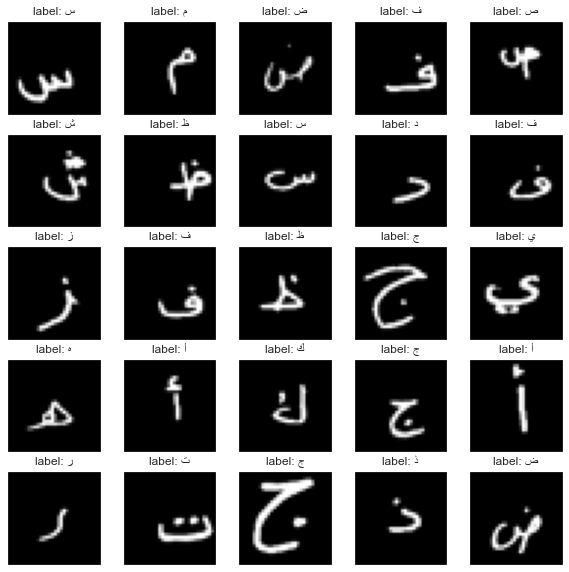

In [252]:
fig = plt.figure(0, figsize=(10,10))
indices = np.random.randint(0, TrainImages.shape[0], size=25)

for i, idx in enumerate(indices):
    plt.subplot(5,5,i+1)
    img_disp = TrainImages[idx]
   # The original dataset is reflected so we will flip it then rotate for a better view only.
    img_disp = np.flip(img_disp, 0)
    img_disp = rotate(img_disp, -90)
    img_disp = Image.fromarray(img_disp) # convert to grayscale
    plt.imshow(img_disp)
    plt.title("label: {}".format(ArabicLetters[int(TrainLabel[idx])]))
    plt.xticks([])
    plt.yticks([])
plt.show()

# Data Preprocessing


### Image Normalization
We rescale the images by dividing every pixel in the image by 255 to make them into range [0, 1]

In [253]:
TrainImages = TrainImages/255
TestImages = TestImages/255

In [254]:
TrainImages = TrainImages.reshape(-1, 32, 32,1)
TestImages = TestImages.reshape(-1, 32, 32,1)
(TrainImages.shape[1:], TestImages.shape[1:])

((32, 32, 1), (32, 32, 1))

### Encoding Categorical Labels
From the labels csv files we can see that labels are categorical values and it is a multi-class classification problem. 

Our outputs are in the form of:
* Letters from ’أ’ to ’ي’ have categories numbers from 10 to 37 = 28

**Here we will encode these categories values using One Hot Encoding with keras.**

One-hot encoding transforms integer to a binary matrix where the array contains only one ‘1’ and the rest elements are ‘0’.



In [255]:
from tensorflow.keras.utils import to_categorical

##TrainImages = to_categorical(TrainImages, num_classes=28)
TrainLabel = to_categorical(TrainLabel, num_classes=28)
##TestImages = to_categorical(TestImages, num_classes=28)
TestLabel = to_categorical(TestLabel, num_classes=28)

In [256]:
print(TrainLabel)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


# CNN Model

Designing Model Architecture


In [263]:
def create_model(optimizer='Adam', kernel_initializer='uniform', activation='relu'):

    model = Sequential()

    model.add(Conv2D(16, (3,3), padding='same', input_shape=input_shape, 
                     kernel_initializer=kernel_initializer, activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(rate=0.3))

    model.add(Conv2D(32, (3,3), padding='same', 
               kernel_initializer=kernel_initializer, activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(rate=0.3))

    model.add(Conv2D(64, (3,3), padding='same', 
               kernel_initializer=kernel_initializer, activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(rate=0.3))

    model.add(Conv2D(128, (3,3), padding='same', 
               kernel_initializer=kernel_initializer, activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(rate=0.3))

    model.add(Conv2D(256, (3,3), padding='same', 
               kernel_initializer=kernel_initializer, activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(rate=0.3))


    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(rate=0.3))

    # fully connected Final layer
    model.add(Dense(28, activation='softmax'))

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Model Summary And Visualization


In [264]:
model = create_model()
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_107 (Conv2D)          (None, 32, 32, 16)        160       
_________________________________________________________________
batch_normalization_96 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_97 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_99 (Dropout)         (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 16, 16, 32)        4640      
_________________________________________________________________
batch_normalization_97 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_98 (MaxPooling (None, 8, 8, 32)        

Creating different models with different parameters to find the best parameter values.

In [265]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# define the grid search parameters
optimizer = ['RMSprop', 'Adam', 'Adagrad', 'Nadam']
kernel_initializer = ['normal', 'uniform']
activation = ['relu', 'linear', 'tanh']

param_grid = dict(optimizer=optimizer, kernel_initializer=kernel_initializer, activation=activation)

# count number of different parameters values combinations
parameters_number = 1
for x in param_grid:
  parameters_number = parameters_number * len(param_grid[x]) 
print("Number of different parameter combinations = {}".format(parameters_number))

Number of different parameter combinations = 24


In [266]:
#creating the models with different hyperparameters
for a,b,c in [(x,y,z) for x in optimizer for z in activation for y in kernel_initializer]:
    params = {'optimizer' : a , 'kernel_initializer' : b , 'activation' : c}
    print(params)
    curr_model = create_model(a, b, c)
    curr_model.fit(TrainImages, TrainLabel, 
                    validation_data=(TestImages, TestLabel),
                    epochs=5, batch_size=20, verbose=1)
    print("=============================================================================")

{'optimizer': 'RMSprop', 'kernel_initializer': 'normal', 'activation': 'relu'}
Epoch 1/5
672/672 [==============================] - 26s 37ms/step - loss: 2.7187 - accuracy: 0.2165 - val_loss: 4.9694 - val_accuracy: 0.1625
Epoch 2/5
672/672 [==============================] - 24s 36ms/step - loss: 1.4879 - accuracy: 0.5057 - val_loss: 1.3853 - val_accuracy: 0.5359
Epoch 3/5
672/672 [==============================] - 23s 35ms/step - loss: 1.0049 - accuracy: 0.6620 - val_loss: 0.7210 - val_accuracy: 0.7481
Epoch 4/5
672/672 [==============================] - 25s 37ms/step - loss: 0.7801 - accuracy: 0.7383 - val_loss: 1.2782 - val_accuracy: 0.6043
Epoch 5/5
672/672 [==============================] - 23s 34ms/step - loss: 0.6690 - accuracy: 0.7791 - val_loss: 4.1404 - val_accuracy: 0.2042
{'optimizer': 'RMSprop', 'kernel_initializer': 'uniform', 'activation': 'relu'}
Epoch 1/5
672/672 [==============================] - 24s 34ms/step - loss: 2.4409 - accuracy: 0.2729 - val_loss: 2.2575 - val_

Epoch 3/5
672/672 [==============================] - 26s 39ms/step - loss: 1.1554 - accuracy: 0.6086 - val_loss: 3.1055 - val_accuracy: 0.2724
Epoch 4/5
672/672 [==============================] - 27s 41ms/step - loss: 0.9233 - accuracy: 0.6811 - val_loss: 1.4629 - val_accuracy: 0.5317
Epoch 5/5
672/672 [==============================] - 27s 41ms/step - loss: 0.7948 - accuracy: 0.7307 - val_loss: 0.5089 - val_accuracy: 0.8181
{'optimizer': 'Adam', 'kernel_initializer': 'normal', 'activation': 'tanh'}
Epoch 1/5
672/672 [==============================] - 29s 41ms/step - loss: 3.1651 - accuracy: 0.1212 - val_loss: 2.3153 - val_accuracy: 0.2703
Epoch 2/5
672/672 [==============================] - 28s 42ms/step - loss: 2.3171 - accuracy: 0.2649 - val_loss: 3.0042 - val_accuracy: 0.1450
Epoch 3/5
672/672 [==============================] - 28s 42ms/step - loss: 1.8008 - accuracy: 0.4068 - val_loss: 3.1822 - val_accuracy: 0.2135
Epoch 4/5
672/672 [==============================] - 28s 42ms/step

672/672 [==============================] - 30s 45ms/step - loss: 0.7634 - accuracy: 0.7404 - val_loss: 0.4217 - val_accuracy: 0.8577
{'optimizer': 'Nadam', 'kernel_initializer': 'uniform', 'activation': 'relu'}
Epoch 1/5
672/672 [==============================] - 31s 43ms/step - loss: 2.6974 - accuracy: 0.2188 - val_loss: 5.8783 - val_accuracy: 0.0947
Epoch 2/5
672/672 [==============================] - 29s 44ms/step - loss: 1.4545 - accuracy: 0.5106 - val_loss: 1.0029 - val_accuracy: 0.6061
Epoch 3/5
672/672 [==============================] - 29s 43ms/step - loss: 1.0629 - accuracy: 0.6347 - val_loss: 0.8489 - val_accuracy: 0.7124
Epoch 4/5
672/672 [==============================] - 29s 43ms/step - loss: 0.8272 - accuracy: 0.7191 - val_loss: 0.7329 - val_accuracy: 0.7258
Epoch 5/5
672/672 [==============================] - 29s 43ms/step - loss: 0.6991 - accuracy: 0.7628 - val_loss: 1.6585 - val_accuracy: 0.5049
{'optimizer': 'Nadam', 'kernel_initializer': 'normal', 'activation': 'line

From the above results we can see that best parameters are:

Optimizer: RMSprop
Kernel_initializer: uniform
Activation: linear


# Building The Final Model With The Best Parameters

In [275]:
input_shape = (32, 32, 1)

model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=input_shape, 
                     kernel_initializer='uniform', activation='linear'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate=0.3))

model.add(Conv2D(32, (3,3), padding='same', input_shape=input_shape, 
                     kernel_initializer='uniform', activation='linear'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate=0.3))

model.add(Conv2D(64, (3,3), padding='same', input_shape=input_shape, 
                     kernel_initializer='uniform', activation='linear'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate=0.3))

model.add(Conv2D(64, (3,3), padding='same', input_shape=input_shape, 
                     kernel_initializer='uniform', activation='linear'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate=0.3))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))

model.add(Dense(28, activation='softmax'))
model.compile(optimizer="RMSprop", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()


Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_236 (Conv2D)          (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_251 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_226 (MaxPoolin (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_254 (Dropout)        (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_237 (Conv2D)          (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_252 (Bat (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_227 (MaxPoolin (None, 8, 8, 32)        

# Fitting the Model


In [276]:
history = model.fit(TrainImages, TrainLabel, validation_data=(TestImages,TestLabel),epochs=10, batch_size=32, shuffle=True, verbose=1)


Epoch 1/10
420/420 [==============================] - 20s 45ms/step - loss: 2.2845 - accuracy: 0.3180 - val_loss: 8.9404 - val_accuracy: 0.0589
Epoch 2/10
420/420 [==============================] - 19s 45ms/step - loss: 1.1467 - accuracy: 0.6185 - val_loss: 1.6855 - val_accuracy: 0.4656
Epoch 3/10
420/420 [==============================] - 19s 45ms/step - loss: 0.8212 - accuracy: 0.7260 - val_loss: 0.5591 - val_accuracy: 0.8029
Epoch 4/10
420/420 [==============================] - 20s 47ms/step - loss: 0.6777 - accuracy: 0.7762 - val_loss: 0.6402 - val_accuracy: 0.7749
Epoch 5/10
420/420 [==============================] - 19s 46ms/step - loss: 0.5773 - accuracy: 0.8067 - val_loss: 0.3584 - val_accuracy: 0.8815
Epoch 6/10
420/420 [==============================] - 18s 43ms/step - loss: 0.5318 - accuracy: 0.8210 - val_loss: 0.3662 - val_accuracy: 0.8869
Epoch 7/10
420/420 [==============================] - 19s 45ms/step - loss: 0.4977 - accuracy: 0.8359 - val_loss: 0.4816 - val_accuracy:

# Saving the Model 

In [286]:
model.save('my_model.hdf5')

# Test the model on the test data

In [288]:
# Final evaluation of the model
metrics = model.evaluate(TestImages, TestLabel, verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))

105/105 [==============================] - 1s 12ms/step - loss: 0.2874 - accuracy: 0.9107
Test Accuracy: 0.9106876850128174
Test Loss: 0.28742027282714844
